<a href="https://colab.research.google.com/github/ravinnd3/PyTorch_tut/blob/main/Model_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

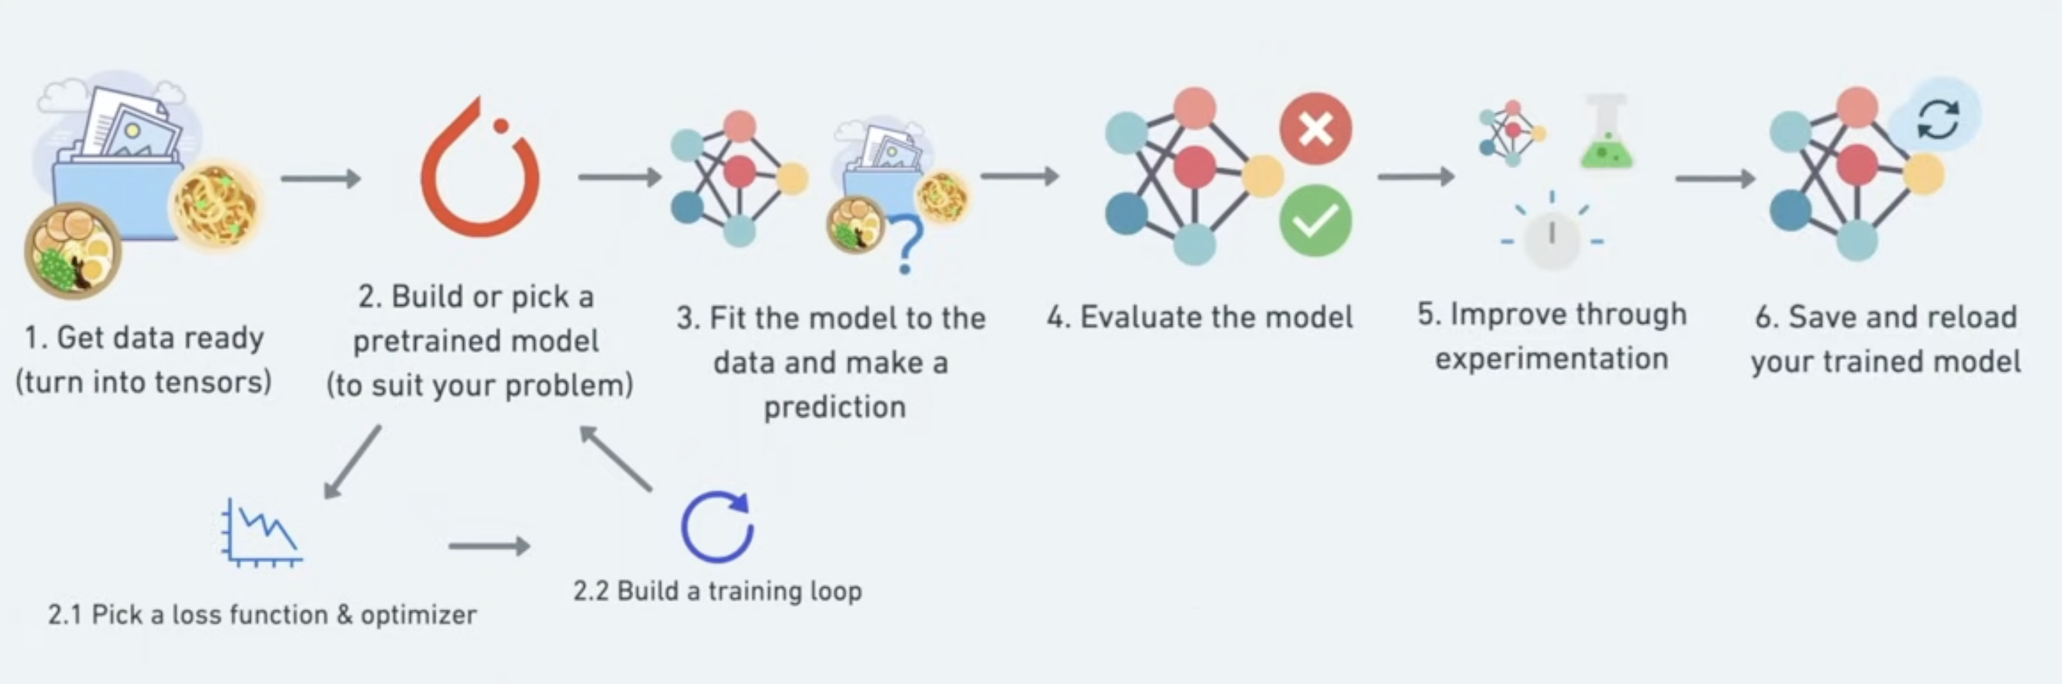

[Pytorch offical tutorial](https://docs.pytorch.org/docs/stable/index.html)

In [1]:
what_were_covered = {1 : "data (prepare and load)",
                     2: "build model",
                     3: "fitting the model to data(training)",
                     4: "making predictions and evaluating a model(inference)",
                     5: "saving and loading a model",
                     6: "putting it all together"
                     }

what_were_covered

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making predictions and evaluating a model(inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn #nn conatins all of pytorch's bulding blocks for Neural Network

import pandas as pd
import matplotlib.pyplot as plt

torch.__version__

'2.9.0+cu126'

# Data Preparing and loading

### Data could be anhything
1. Excel
2. Image
3. Videos
4. Audio
5. DNA
6. Text


Machine learning is game of two parts:
1. Get data into numerical represenattion
2. Building a model to learn patters in that numerical representation.


Lets use Linear Regression

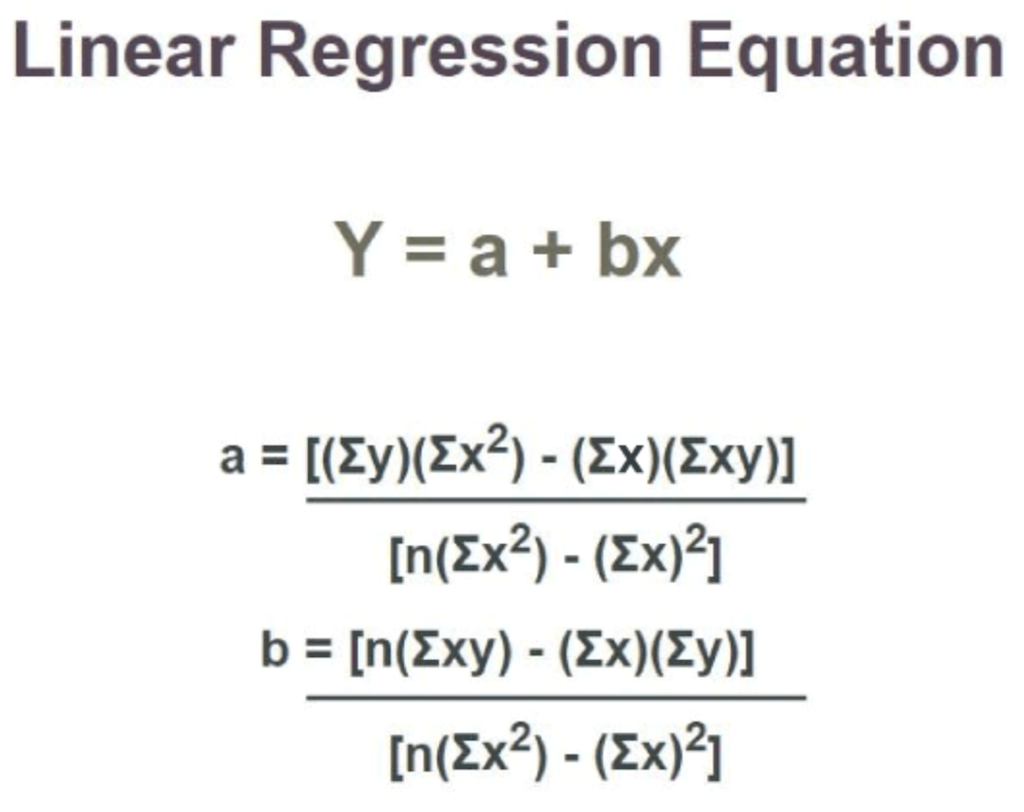

In [3]:
# # Create *Known* Parameters
# weight = b
# bias = a
weights = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start=start, end=end, step=step).unsqueeze(dim=1)
y = weights * X + bias

In [4]:
len(X)

50

In [5]:
X[:10] , y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

#splitting the data in Training and testing dataset

In [6]:
train_split = int(0.8*len(X))
X_train , y_train = X[:train_split],y[:train_split]

X_test , y_test = X[train_split:] , y[train_split:]

len(X_train) , len(y_train) , len(X_test) , len(y_test)

(40, 40, 10, 10)

In [7]:
def plot_predictions(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=None):

  """
  plots trainig data , test data and compare predictions
  """

  plt.figure(figsize=(10,7))

  #plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training Data")

  #plot test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="Test Data")

  if predictions is not None:
    #plot predictions in red
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

  plt.legend(prop={"size":14})


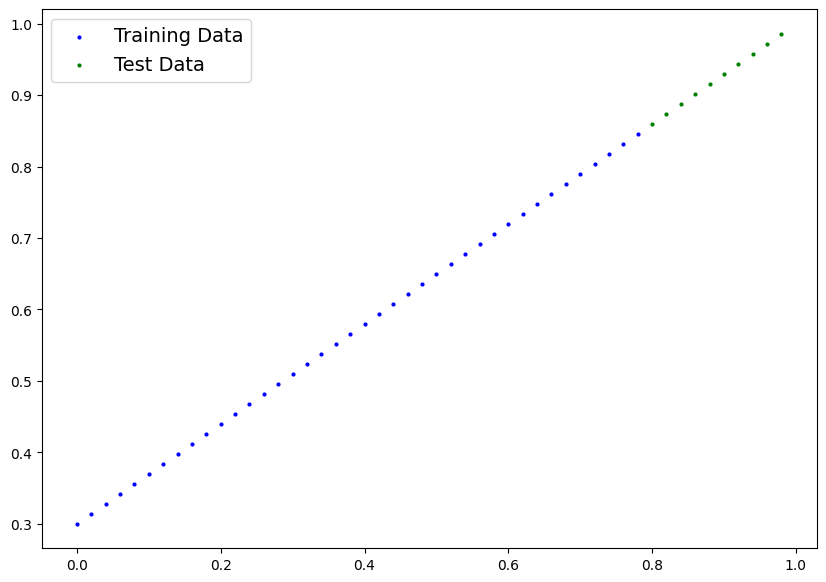

In [8]:
plot_predictions();

# Building Model
First pytorch model

Create Linear Regression model.

WHat our model does:
* Start with random values ( weights & bias)
* Look at training data and adjust the random values better representation ( or get closer to ) the ideal values (the weights & bias values we used to create the data)


How does it do so?
Through two main algorithms:
1. Gradient descent
2. Backpropogation

In [9]:
# Create linear Regression model class

class LinearRegressionModel(nn.Module):  # <- Almost everything is oytorch inherit from torch.nn
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward defines the computation in the model

  def forward(self,x:torch.Tensor) -> torch.Tensor:  # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formulea




### Pytorch model building essentials

* torch.nn -> contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Prameter -> what parameter should our model try and learn, often a pytorch layer from torch.nn will set these for us.
* torch.nn.Module -> The base class for all neural networks modules, if you subclass it, you should override forward()
* torch.optim -> this is where the optimizers in pytorch live, they will help with gradient descent.
* def forward() -> All nn.Modelu subclasses requires to overwrite forward(), this method defines what happens in forward computation.

In [23]:
torch.manual_seed(42)

#create an instanace of the model (this is the subclass of nn.Module)

model_0 = LinearRegressionModel()

model_0

LinearRegressionModel()

In [24]:
#check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [25]:
#list the named parameter
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

#Making predictions using `torch.inference_mode()`

to check out model predictive power , lets see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, its going to run through `forward()` method

In [30]:
# Make predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

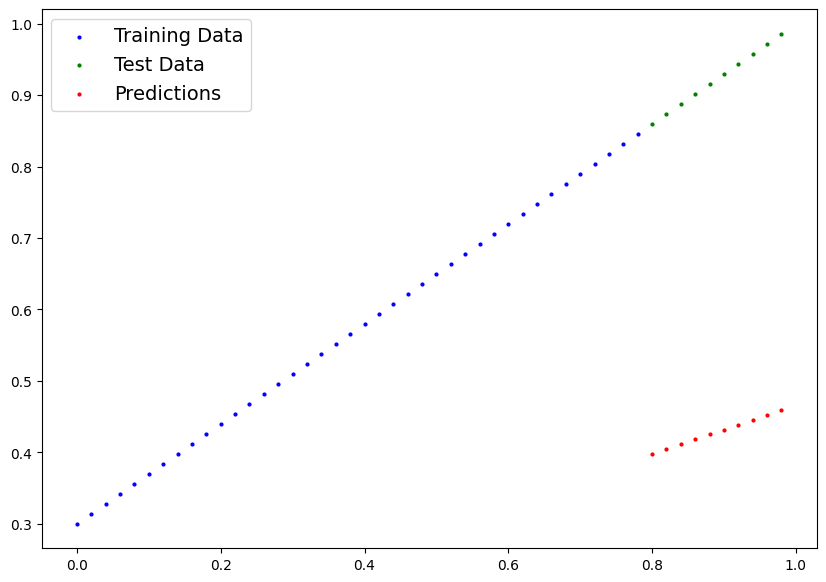

In [31]:
plot_predictions(predictions=y_preds)